In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np


In [2]:
# Load the questionnaire data
questionnaire_df = pd.read_excel('data/questionnaire_data-561422-2025-11-11-1622.xlsx')

# Display column names
# print("Column names:")
# print(list(questionnaire_df.columns))
# print(questionnaire_df.columns)

/home/michaelt/.cache/pypoetry/virtualenvs/in9060-as2-Pf7P2CoS-py3.12/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
# Filter out columns containing "$"
filtered_columns = [col for col in questionnaire_df.columns if '$' not in col and col != 'Participant number']

# Calculate mean and variance for the filtered columns
stats_df = pd.DataFrame({
    'Mean': questionnaire_df[filtered_columns].mean(numeric_only=True),
    'Variance': questionnaire_df[filtered_columns].var(numeric_only=True)
})

print(stats_df)

                                                         Mean  Variance
How old are you?                                    24.633333  5.412644
How experienced are you with robotic systems?        1.100000  0.093103
Did you experience delays between your actions ...   2.433333  1.357471
How difficult was it to perform the task?            2.933333  0.547126
I felt like I was controlling the movement of t...   4.233333  0.598851
It felt like the robot was part of my body           2.433333  1.150575
Did you experience delays between your actions ...   2.300000  1.044828
How difficult was it to perform the task?.1          2.300000  0.906897
I felt like I was controlling the movement of t...   4.166667  0.626437
It felt like the robot was part of my body.1         2.800000  1.062069
Did you experience delays between your actions ...   2.500000  1.155172
How difficult was it to perform the task?.2          2.400000  0.731034
I felt like I was controlling the movement of t...   4.100000  0

In [4]:
# Example usage mapping questionnaire numeric columns as conditional distributions
numeric_cols = [c for c in questionnaire_df.columns if questionnaire_df[c].dtype.kind in 'if' and '$' not in c]
# Limit to first 4 for clarity
example_arrays = [questionnaire_df[c].dropna().values for c in [numeric_cols[i] for i in [9, 13, 17, 21]]]

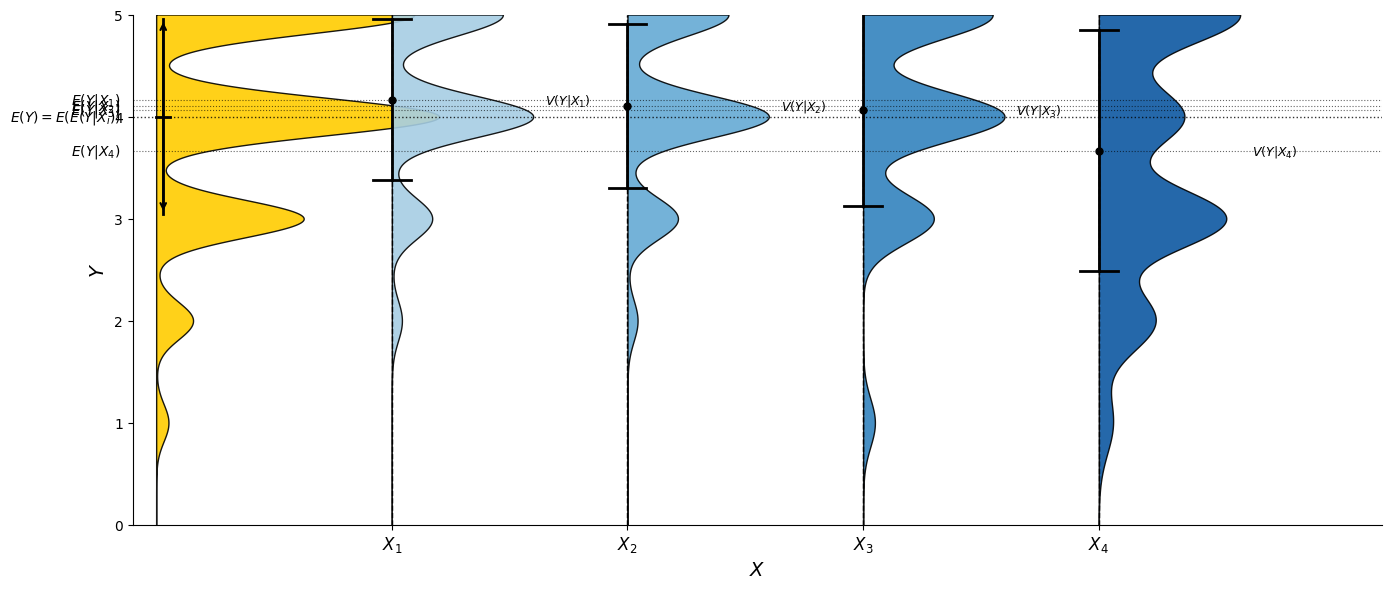

In [10]:
import fig.variance_plot as vp
fig2, ax2 = vp.variance_decomposition_plot(example_arrays, bandwidth_adjust=0.5)
plt.show()